# **Project Name**    - AirBnb Data Analysis

Project Type - EDA

Contribution - Individual

# **GitHub Link -**

https://github.com/AchalaJain

# Problem Statement

BUSINESS PROBLEM OVERVIEW

In the vacation rental industry, platforms like Airbnb host millions of listings globally, catering to a diverse range of travelers. With over 150 million users and more than 7 million listings worldwide, competition among hosts is fierce. Guests can easily switch between different properties or platforms, driven by various factors such as price, location, and amenities. Understanding what drives guest behavior, satisfaction, and preferences is crucial for hosts and the platform to optimize listings and enhance guest retention.

For Airbnb, maintaining a high level of guest satisfaction is critical for ensuring repeat bookings and minimizing cancellations. Research shows that acquiring a new customer can cost up to five times more than retaining an existing one, making guest retention a key priority. Additionally, a 5% increase in customer retention can lead to a 25% to 95% increase in profits, underscoring the importance of understanding guest preferences and behavior.

In this project, we will analyze guest-level data from Airbnb, conduct exploratory data analysis (EDA) to uncover the main factors influencing guest satisfaction and booking behavior, and identify trends that can help optimize listings and enhance guest experiences on the platform. The goal is to provide actionable insights that will help improve guest retention and overall platform success.

# Define Your Business Objective?

***Provide actionable insights that will help improve guest retention and overall platform success.***

# ***Let's Begin!***

## *1. Know Your Data*

### Import Libraries

In [59]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns

### Dataset Loading

In [60]:
# Load Dataset
'''Creating a dataframe of the given dataset'''
df = pd.DataFrame(pd.read_csv('/content/Airbnb NYC 2019.csv'))

### Dataset First View

In [61]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


###Dataset Rows & Columns count

In [62]:
df.shape

(48895, 16)

### Dataset Information

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [64]:
duplicates = df[df.duplicated()]
duplicates

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [65]:
duplicate_names = df[df.duplicated(subset='name')]
duplicate_names

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
661,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48684,36382847,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64439,-74.01816,Private room,185,1,0,NaN,NaN,2,177
48735,36412461,"Sunny, Cozy, Private Room In The Heart of Bush...",147515897,Flávia,Brooklyn,Bushwick,40.70366,-73.92728,Private room,84,3,0,NaN,NaN,1,28
48759,36420404,Home Sweet Home,273656890,Liana,Manhattan,East Harlem,40.79266,-73.94740,Private room,50,1,0,NaN,NaN,1,81
48791,36427922,Home away from home,238163900,Lucy,Queens,Cambria Heights,40.68557,-73.72731,Private room,50,3,0,NaN,NaN,1,176


In [66]:
df.loc[df.duplicated(subset= ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47876,35966653,"Bright, contemporary and best location",24232061,Tracy,Manhattan,Upper East Side,40.77297,-73.95530,Private room,122,10,0,NaN,NaN,3,306
48026,36039574,★Premier Queen Room with Balcony ★,270874051,Hotel Vetiver,Queens,Long Island City,40.75300,-73.93485,Private room,99,1,0,NaN,NaN,8,319
48207,36139806,"30 mins to Times Square!! 15 mins LGA, 25mins ...",260209224,Lotay,Queens,Jackson Heights,40.75077,-73.87020,Entire home/apt,67,2,0,NaN,NaN,3,134
48662,36372006,Very Clean Private Room Near Buses & Restauran...,118405437,PengYu,Queens,Woodhaven,40.69411,-73.86877,Private room,66,1,0,NaN,NaN,2,365


In [67]:
df.query('name == "Loft w/ Terrace @ Box House Hotel"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
680,253839,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73783,-73.95259,Private room,249,3,3,2015-11-03,0.03,28,60


As we can see, all the data is same except for price, number_of_reviews, last_review and reviews_per_month. We'll keep the latest data and drop the duplicates.

In [68]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
#Replace the NaT values in last_review column.
df['last_review'].replace(np.nan,df['last_review'].max(), inplace=True)


<ipython-input-69-0530ac85a949>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].replace(np.nan,df['last_review'].max(), inplace=True)


In [70]:
#Sorting the data according to last_review
df = df.sort_values(by=['last_review','price'], ascending=False).reset_index(drop=True)


In [71]:
#Remove the duplicates
df=df.drop_duplicates(subset=['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'], keep='first').reset_index(drop=True)

In [72]:
df.shape

(48662, 16)

In [73]:
df.query('name == "Loft w/ Terrace @ Box House Hotel"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28697,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60


In [74]:
df.loc[df.duplicated(subset= ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


#### Missing Values/Null Values

In [75]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


We have 16 and 21 null values in name and host_name columns respectievely. But these data can be managed with their respective ids. We also have null values in reviews_per_month but this column is not of much important for our analysis.

However, let's check for any outliers in our data.

In [76]:
#Check for outliers
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.866200e+04,4.866200e+04,48662.000000,48662.000000,48662.000000,48662.000000,48662.000000,48662,38673.000000,48662.000000,48662.000000
mean,1.900464e+07,6.746245e+07,40.728926,-73.952196,152.682997,7.002219,23.337758,2018-11-30 01:10:55.903990784,1.374972,6.989478,112.327155
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.462062e+06,7.802407e+06,40.690000,-73.983068,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.190000,1.000000,0.000000
50%,1.965763e+07,3.070801e+07,40.722985,-73.955660,105.000000,2.000000,5.000000,2019-06-14 00:00:00,0.720000,1.000000,44.000000
75%,2.913386e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,2.020000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098015e+07,7.851436e+07,0.054569,0.046098,240.444403,20.535357,44.628205,NaN,1.680658,32.484620,131.417960


From the above data, we observe that min price is 0 and max minimum_nights is 1250, which are practically not possible.


In [77]:
#As per the data from website, the minimum price is $20. Hence replace price below 20 to 20.
df['price'].replace(range(0,20), 20, inplace=True)
df['price'].describe()

<ipython-input-77-5b47f81f065c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(range(0,20), 20, inplace=True)


,price
count,48662.000000
mean,152.693642
std,240.438233
min,20.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


In [78]:
#Replace minimum_nights > 365 to 365
df['minimum_nights'].replace(range(366,1251), 365, inplace=True)
df['minimum_nights'].describe()


<ipython-input-78-bf0eac80c088>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['minimum_nights'].replace(range(366,1251), 365, inplace=True)


,minimum_nights
count,48662.000000
mean,6.914821
std,17.543710
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,365.000000


### What did you know about your dataset?

The dataset provided is from the Airbnb NYC 2019 listings. The goal is to analyze various aspects of Airbnb listings, such as pricing, availability, and review patterns, to derive insights that could be useful for hosts, guests, or the platform itself.

This dataset contains 48,895 rows and 16 columns. It includes a mix of numerical and categorical data types, providing a comprehensive view of the listings in NYC during 2019.

The data is organized into the following columns: `['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']`.

Out of these:

- 3 columns have `float64` data type (Numerical)
- 7 columns have `int64` data type (Numerical)
- 6 columns have `object` data type (Categorical)

The primary key for this dataset is the `id` column, which uniquely identifies each listing.

### Data Quality Overview

1. **Duplicate Values:**
   - There are no exact duplicate rows in the dataset.
   - However, in the `name` column, 998 rows have duplicate names. The differences are mainly in the `price` column, suggesting that the prices may have varied over time for the same listing. To handle this, we sorted the dataframe based on the most recent entries, utilizing the `last_review` column as a timestamp.

2. **Missing Values:**
   - The dataset has some missing values across different columns:
     - `last_review` and `reviews_per_month` both have 10,052 missing values. Since `last_review` serves as a timestamp, we replaced the missing values with the latest date available in the dataset to maintain the accuracy of the time-based sorting.
     - The `name` column has 16 missing values, and the `host_name` column has 21 missing values.

3. **Handling Missing and Duplicate Data:**
   - We addressed the duplicate `name` values by retaining only the most recent entries for each name.
   - Missing dates in `last_review` were filled with the most recent date available, ensuring that the timestamp remains relevant.
   - Missing names and host names were noted, but as these represent a small fraction of the data, they did not significantly impact our analysis.

After performing these data cleaning operations, our dataset is now well-prepared for further data wrangling and analysis.

## ***2. Understanding Your Variables***

In [79]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [80]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.866200e+04,4.866200e+04,48662.000000,48662.000000,48662.000000,48662.000000,48662.000000,48662,38673.000000,48662.000000,48662.000000
mean,1.900464e+07,6.746245e+07,40.728926,-73.952196,152.693642,6.914821,23.337758,2018-11-30 01:10:55.903990784,1.374972,6.989478,112.327155
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,20.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.462062e+06,7.802407e+06,40.690000,-73.983068,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.190000,1.000000,0.000000
50%,1.965763e+07,3.070801e+07,40.722985,-73.955660,105.000000,2.000000,5.000000,2019-06-14 00:00:00,0.720000,1.000000,44.000000
75%,2.913386e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,2.020000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098015e+07,7.851436e+07,0.054569,0.046098,240.438233,17.543710,44.628205,NaN,1.680658,32.484620,131.417960


### Variables Description

- **id**: A unique identifier for each listing.

- **name**: The name of the Airbnb listing.

- **host_id**: A unique identifier for the host of the listing.

- **host_name**: The name of the host who listed the property.

- **neighbourhood_group**: The broader geographical area in which the listing is located, such as Brooklyn, Manhattan, etc.

- **neighbourhood**: The specific neighborhood within the `neighbourhood_group`, offering a more granular location detail.

- **latitude**: The latitude coordinate of the listing, used for mapping and location-based analysis.

- **longitude**: The longitude coordinate of the listing, used alongside latitude for mapping.

- **room_type**: The type of room being offered, such as entire home/apt, private room, or shared room.

- **price**: The price per night for the listing in USD.

- **minimum_nights**: The minimum number of nights required for booking the listing.

- **number_of_reviews**: The total number of reviews the listing has received from guests.

- **last_review**: The date when the listing last received a review, used for understanding the recency of guest feedback.

- **reviews_per_month**: The average number of reviews the listing receives per month.

- **calculated_host_listings_count**: The total number of listings managed by the host, indicating whether the host is an individual or a commercial entity.

- **availability_365**: The number of days in a year that the listing is available for booking.


### Check Unique Values for each variable.

In [81]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f"No. of unique values in {i} is {df[i].nunique()}.")

No. of unique values in id is 48662.
No. of unique values in name is 47905.
No. of unique values in host_id is 37447.
No. of unique values in host_name is 11452.
No. of unique values in neighbourhood_group is 5.
No. of unique values in neighbourhood is 221.
No. of unique values in latitude is 19022.
No. of unique values in longitude is 14678.
No. of unique values in room_type is 3.
No. of unique values in price is 664.
No. of unique values in minimum_nights is 101.
No. of unique values in number_of_reviews is 394.
No. of unique values in last_review is 1762.
No. of unique values in reviews_per_month is 936.
No. of unique values in calculated_host_listings_count is 47.
No. of unique values in availability_365 is 366.


In [82]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2019-07-08,NaN,1,83
1,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-07-08,NaN,1,365
2,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,2019-07-08,NaN,12,146
3,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,2019-07-08,NaN,1,364
4,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,2019-07-08,NaN,6,364


## 3. ***Data Wrangling***

### Data Wrangling Code

In [83]:
# Group by 'host name' to aggregate data for each host
host_groups = df.groupby('name')

# Initialize lists to store data
hosts = []
total_listings = []
average_prices = []

# Loop through each host group to calculate total listings and average price
for host, data in host_groups:
    hosts.append(host)
    total_listings.append(data['calculated_host_listings_count'].sum())  # Sum of listings for each host
    average_prices.append(data['price'].mean().round(2))    # Mean price of the listings

# Create a DataFrame to store host data
host_df = pd.DataFrame({
    'Host Name': hosts,
    'Total Listings': total_listings,
    'Average Price': average_prices
})

# Calculate earnings for each host (Total Listings * Average Price)
host_df['Earnings'] = host_df['Total Listings'] * host_df['Average Price']

# Sort the DataFrame by 'Total Listings' in descending order
host_df = host_df.sort_values(by='Total Listings', ascending=False).reset_index(drop=True)

# Drop duplicate rows based on 'Total Listings' if applicable
host_df = host_df.drop_duplicates(subset='Total Listings').reset_index(drop=True)

# Select the top 10 hosts by listing count
top_10_hosts = host_df.head(10)

# Sort by Earnings in descending order to get top hosts by earnings
top_hosts_by_earnings = host_df.sort_values(by='Earnings', ascending=False).reset_index(drop=True)

# Output the top 10 hosts by earnings
top_hosts_by_earnings.head(10)



,Host Name,Total Listings,Average Price,Earnings
0,Pleasant 1BR in Midtown East by Sonder,654,197.00,128838.00
1,"Central Herald Sq.1BR w/ Roofdeck, Gym next to...",232,334.00,77488.00
2,Sonder | Stock Exchange | Gorgeous 1BR + Kitchen,327,230.00,75210.00
3,"West 55th street, Lux 1bd Serviced Apartment",261,251.67,65685.87
4,West 15th Street Cozy Chelsea 1bd Serviced Apt,174,200.00,34800.00
5,2BR WITH PRIVATE PATIO EAST VILLAGE,114,249.00,28386.00
6,Cozy Studio Apt Upper East Side Near Hospitals,121,199.00,24079.00
7,A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE,98,212.50,20825.00
8,Sonder | 21 Chelsea | Lively Studio + Rooftop,96,202.00,19392.00
9,Charming Upper West Side Apartment,92,166.50,15318.00


In [84]:
# Identify the unique neighbourhood groups
df['neighbourhood_group'].unique()  # There are 5 different groups


array(['Manhattan', 'Brooklyn', 'Staten Island', 'Bronx', 'Queens'],
      dtype=object)

In [85]:
neighbourhood_groups = df.groupby('neighbourhood_group')

# Initialize lists to store information for each group
group_names = []
total_listings = []
total_reviews = []
highest_price = []
lowest_price = []

# Loop through each group to gather relevant statistics
for group_name, subset in neighbourhood_groups:
    group_names.append(group_name)
    total_listings.append(subset['calculated_host_listings_count'].sum())
    total_reviews.append(subset['number_of_reviews'].sum())
    highest_price.append(subset['price'].max())
    lowest_price.append(subset['price'].min())

# Create a DataFrame to display the results
neighbourhood_stats_df = pd.DataFrame({
    'Neighbourhood Group': group_names,
    'Total Listings': total_listings,
    'Total Reviews': total_reviews,
    'Min Price': lowest_price,
    'Max Price': highest_price
})

neighbourhood_stats_df


,Neighbourhood Group,Total Listings,Total Reviews,Min Price,Max Price
0,Bronx,2410,28326,20,2500
1,Brooklyn,44976,485088,20,10000
2,Manhattan,269295,453964,20,10000
3,Queens,22577,156744,20,10000
4,Staten Island,864,11540,20,5000


In [86]:


# Group the dataset by neighbourhood group and room type
neighbourhood_room_groups = df.groupby(['neighbourhood_group', 'room_type'])

# Initialize lists to store information for each group and room type
group_names = []
room_type_names = []
total_listings = []
total_reviews = []
highest_price = []
lowest_price = []
avg_price = []

# Loop through each combination of neighbourhood group and room type to gather relevant statistics
for (group_name, room_type), subset in neighbourhood_room_groups:
    group_names.append(group_name)
    room_type_names.append(room_type)
    total_listings.append(subset['calculated_host_listings_count'].sum())
    total_reviews.append(subset['number_of_reviews'].sum())
    highest_price.append(subset['price'].max())
    lowest_price.append(subset['price'].min())
    avg_price.append(subset['price'].mean().round(2))

# Create a DataFrame to display the results
neighbourhood_room_stats_df = pd.DataFrame({
    'Neighbourhood Group': group_names,
    'Room Type': room_type_names,
    'Total Listings': total_listings,
    'Total Reviews': total_reviews,
    'Min Price': lowest_price,
    'Max Price': highest_price,
    'Avg Price': avg_price
})

# Sort by neighbourhood group and total listings in descending order
neighbourhood_room_stats_df = neighbourhood_room_stats_df.sort_values(by=['Neighbourhood Group', 'Total Listings'], ascending=[True, False])

# Display the result
neighbourhood_room_stats_df


,Neighbourhood Group,Room Type,Total Listings,Total Reviews,Min Price,Max Price,Avg Price
1,Bronx,Private room,1498,16267,20,2500,67.10
0,Bronx,Entire home/apt,707,11627,28,1000,127.51
2,Bronx,Shared room,205,432,20,800,59.80
4,Brooklyn,Private room,25233,212812,20,7500,76.49
3,Brooklyn,Entire home/apt,17194,266483,20,10000,178.24
5,Brooklyn,Shared room,2549,5793,20,725,50.66
6,Manhattan,Entire home/apt,242298,234918,20,10000,249.33
7,Manhattan,Private room,25206,208811,20,9999,116.43
8,Manhattan,Shared room,1791,10235,20,1000,89.32
10,Queens,Private room,18343,93418,20,10000,71.37


In [87]:
#Divide the dataset as per the room type.

df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [88]:
# Group the dataset by room types
room_groups = df.groupby('room_type')

# Initialize lists to store room group statistics
room_types = []
total_listings = []
total_reviews_per_month = []
highest_price = []
lowest_price = []
average_price = []

# Loop through each room type group to gather statistics
for room_type, room_data in room_groups:
    room_types.append(room_type)
    total_listings.append(room_data['calculated_host_listings_count'].sum())
    total_reviews_per_month.append(room_data['reviews_per_month'].sum())
    highest_price.append(room_data['price'].max())
    lowest_price.append(room_data['price'].min())
    average_price.append(room_data['price'].mean().round(2))

# Create a DataFrame to display the results
room_stats_df = pd.DataFrame({
    'Room Type': room_types,
    'Total Listings': total_listings,
    'Total Reviews/Month': total_reviews_per_month,
    'Min Price': lowest_price,
    'Max Price': highest_price,
    'Avg Price': average_price
})

room_stats_df


,Room Type,Total Listings,Total Reviews/Month,Min Price,Max Price,Avg Price
0,Entire home/apt,263986,26525.13,20,10000,211.73
1,Private room,70813,25416.53,20,10000,89.62
2,Shared room,5323,1232.65,20,1800,70.34


In [89]:
# Now let us check how many different neighbourhoods are there in total.
df['neighbourhood'].count()

48662

In [90]:
# Group the dataset by neighbourhood areas
area_groups = df.groupby('neighbourhood')

# Initialize lists to store area statistics
areas = []
listing_count = []
avg_price = []

# Loop through each area group to gather statistics
for area, n_data in area_groups:
    areas.append(area)
    listing_count.append(n_data['calculated_host_listings_count'].sum())
    avg_price.append(round(n_data['price'].mean(), 2))

# Create a DataFrame to display the results
area_feat_df = pd.DataFrame({
    'Area': areas,
    'Listing Count': listing_count,
    'Average Price': avg_price
})

# Sort by Listing Count in descending order and reset the index
area_feat_df = area_feat_df.sort_values(by='Listing Count', ascending=False).reset_index(drop=True)

# Display the top 10 areas
area_feat_df.head(10)



,Area,Listing Count,Average Price
0,Financial District,84942,226.02
1,Hell's Kitchen,24754,205.32
2,Murray Hill,24726,221.17
3,Midtown,24647,282.66
4,Chelsea,17483,248.35
5,Theater District,16151,246.59
6,Upper East Side,14909,189.10
7,Upper West Side,13201,211.25
8,Bedford-Stuyvesant,9605,107.76
9,Tribeca,7519,492.23


In [91]:
# Group the dataset by neighbourhood areas and calculate reviews
neighbourhood_review_groups = df.groupby('neighbourhood')

# Initialize lists to store area statistics
neighbourhoods = []
total_reviews_per_area = []

# Loop through each area group to gather total reviews
for neighbourhood, review_data in neighbourhood_review_groups:
    neighbourhoods.append(neighbourhood)
    total_reviews_per_area.append(review_data['number_of_reviews'].sum())

# Create a DataFrame to display the results
neighbourhood_reviews_df = pd.DataFrame({
    'Neighbourhood': neighbourhoods,
    'Total Reviews': total_reviews_per_area
})

# Sort by Total Reviews in descending order and reset the index
neighbourhood_reviews_df = neighbourhood_reviews_df.sort_values(by='Total Reviews', ascending=False).reset_index(drop=True)

# Display the top 10 neighbourhoods by total reviews
neighbourhood_reviews_df.head(10)


,Neighbourhood,Total Reviews
0,Bedford-Stuyvesant,109821
1,Williamsburg,85303
2,Harlem,75956
3,Bushwick,52411
4,Hell's Kitchen,50088
5,East Village,44625
6,East Harlem,36446
7,Crown Heights,36398
8,Upper West Side,35963
9,Upper East Side,31638


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

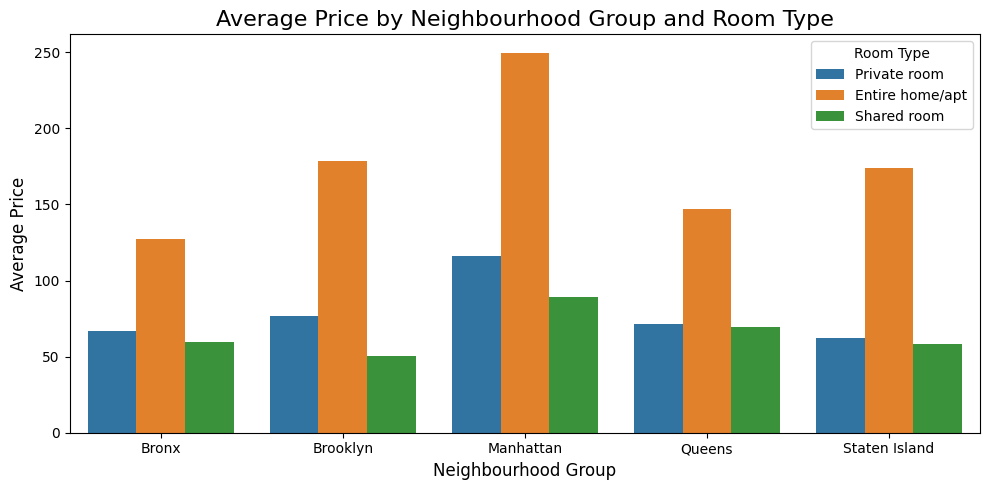

In [92]:
# Create a bar plot showing the relationship between neighbourhood group, room type, and price
plt.figure(figsize=(10,5))

# Use seaborn's barplot to plot the data
sns.barplot(data=neighbourhood_room_stats_df, x='Neighbourhood Group', y='Avg Price', hue='Room Type')

# Add titles and labels
plt.title('Average Price by Neighbourhood Group and Room Type', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Show the plot
# plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify the most preferred location according to the average price & to gain insights depending on the room type.

I chose this bar chart to visualize the relationship between Neighbourhood Group, Room Type, and Average Price because it effectively highlights the variations in pricing across different room types in each neighbourhood. The combination of Neighbourhood Group on the x-axis, Average Price on the y-axis, and Room Type as a color-coded hue allows for a clear and comparative analysis.

##### 2. What is/are the insight(s) found from the chart?

1. Manhatten prices are higher in all the room types and amongst the other neighbourhood groups.
2. Entire home/apt prices are higher in all the neighbourhood groups.
3. Shared rooms prices are lowest in all the neighbourhood groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it'll help create a positive business impact as this analysis helps understand not just how prices vary across room types and neighbourhoods, but also how Airbnb listings in different areas serve different traveler needs and budget levels.

Neighbourhood Comparison: More expensive areas like Manhattan have higher
prices for all room types.

Room Type Price Gap: Entire home/apt listings are consistently the most expensive across all neighbourhoods, followed by Private rooms and Shared rooms.

Budget-Friendly Areas: Neighbourhoods like Bronx have significantly lower prices, making them more attractive for budget-conscious travelers.

Variety in Mid-Tier Areas: Neighbourhoods like Queens and Brooklyn may offer a wider range of room types at competitive prices, catering to different market segments

#### Chart - 2

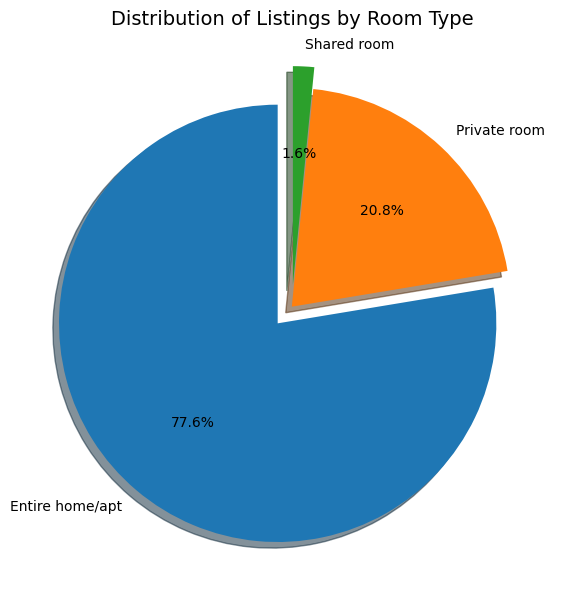

In [93]:
# Visualize the most preferred room type using a pie chart

# Ensure the values in 'Listing Count' are properly normalized
total_listings = room_stats_df['Total Listings'].sum()

# Calculate the percentages for each room type
room_stats_df['Listing Percentage'] = (room_stats_df['Total Listings'] / total_listings) * 100

# Plotting the pie chart using normalized data
plt.figure(figsize=(8, 6))
plt.pie(room_stats_df['Listing Percentage'],
        labels=room_stats_df['Room Type'],
        autopct="%1.1f%%",
        explode=(0.1, 0, 0.1),
        shadow=True,
        startangle=90)

# Add title
plt.title("Distribution of Listings by Room Type", fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The pie chart was selected because it effectively communicates the proportion of each room type within the Airbnb listing dataset. By showcasing this data in a simple, intuitive format, it allows for easy comparison and insight into which room types are most prevalent, making it a natural choice for visualizing categorical data with proportional relationships.

##### 2. What is/are the insight(s) found from the chart?

The pie chart demonstrates that entire homes dominate the Airbnb market, with private and shared rooms having much smaller shares. This indicates guest preferences for privacy and full control of a property, making it a crucial insight for both hosts and platform analysts to consider when making listing or marketing decisions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the insights offer potential for positive business growth, over-reliance on current trends or ignoring certain market segments could have negative consequences.

*   Positive Impact: The insights allow hosts and investors to make data-driven decisions that align with guest preferences, ensuring higher occupancy rates and potentially increased profits.

*   Negative Impact: If hosts all pursue the same strategy (e.g., focusing only on entire homes), the market could become over-saturated, leading to price competition and reduced margins. Additionally, neglecting niche segments (like private rooms) could lead to missed opportunities and decreased overall growth.

Balancing the insights with market flexibility is key to sustainable success.



#### Chart - 3

<ipython-input-94-45348a7d4dee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette="Set2")


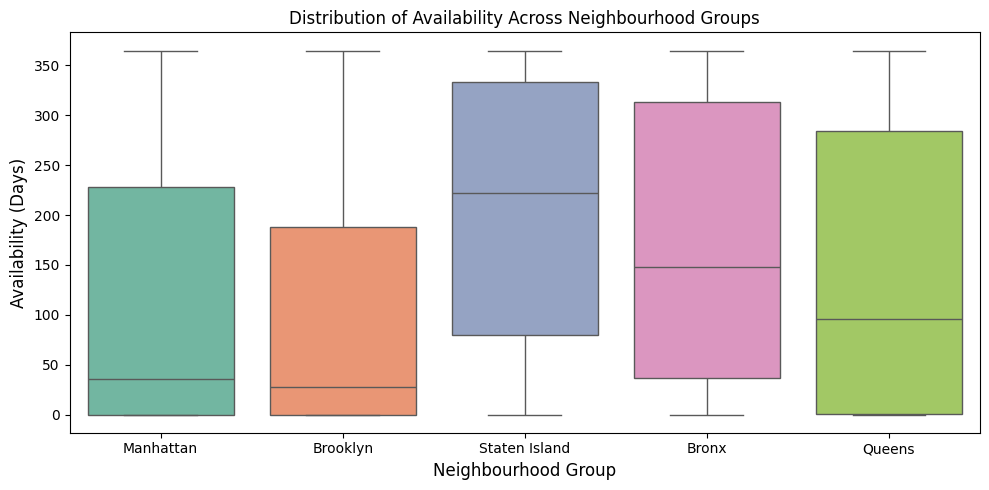

In [94]:
#Use seaborn's box plot to plot the graph
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette="Set2")
plt.title('Distribution of Availability Across Neighbourhood Groups', fontsize=12)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Availability (Days)', fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the **box plot** to visualize the distribution of availability across neighbourhood groups because it effectively shows the **variability** and **spread** of availability, highlights **outliers**, and allows for easy **comparison** of central tendencies (medians) between groups. It's ideal for summarizing large datasets and quickly identifying patterns and differences in availability across multiple neighbourhoods.

##### 2. What is/are the insight(s) found from the chart?

1. **Availability Distribution**:
   - The box plot indicates that **Brooklyn** has the **lowest availability**, suggesting it experiences **high demand** for listings. This could imply that listings in this area are frequently booked, leading to fewer available days.

2. **High Availability Areas**:
   - In contrast, neighbourhoods like **Staten Island** and **the Bronx** exhibit higher availability, indicating that listings in these areas may be less frequently booked. This suggests a potential oversupply of listings or lower demand.

3. **Median Availability**:
   - The **median availability** line within the boxes shows that areas with lower availability, such as **Brooklyn**, might be more competitive, while neighbourhoods with higher availability may need to adjust their strategies to attract more bookings.

4. **Outliers**:
   - The presence of **outliers** in some neighbourhoods indicates that certain listings have exceptional availability, which may point to unique pricing strategies or property management issues that could be addressed.

These insights can guide hosts and platform managers in making informed decisions about pricing, marketing, and listing management based on availability patterns in different neighbourhoods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
The insights can lead to a positive business impact by focusing on neighbourhoods with **low availability**, like **Brooklyn**. This indicates high demand, meaning hosts in such areas may be able to increase prices or expand their listings. Targeting high-demand areas with more listings can improve revenue and platform engagement. Additionally, marketing campaigns for areas like **Brooklyn** could emphasize the limited availability, creating a sense of urgency for potential guests.

**Potential for Negative Growth:**
The insights suggest that areas with **higher availability**, like **Staten Island** or **the Bronx**, might struggle with demand, which could signal challenges in attracting bookings. If the high availability continues without intervention (e.g., price reductions, improved listing quality), it could lead to reduced bookings and revenue, negatively affecting growth in these neighbourhoods. Over time, hosts in high-availability areas may become discouraged if occupancy rates remain low, which could affect platform reputation and sustainability in those areas.

#### Chart - 4

<ipython-input-95-1b2b6e4ad6f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='room_type', y='availability_365', palette="Set2")


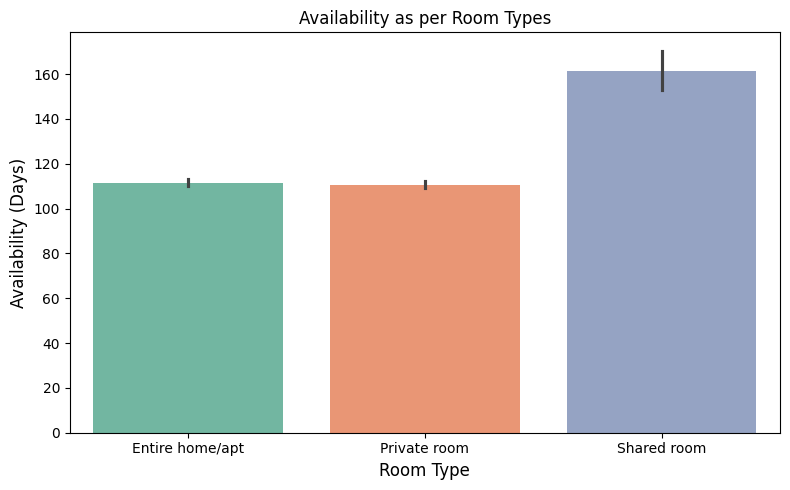

In [95]:
#Availability based on room types
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='room_type', y='availability_365', palette="Set2")
plt.title('Availability as per Room Types', fontsize=12)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Availability (Days)', fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **bar plot** because it effectively compares the **availability** (days per year) across different **room types** (categorical variable). It's ideal for showing differences between categories, providing clear, easy-to-interpret insights, and focusing on direct comparisons. The chart highlights which room type has the highest or lowest availability in a straightforward way.

##### 2. What is/are the insight(s) found from the chart?

From the bar plot, we can observe that **availability differs significantly across room types**. **Entire home/apartment and Private rooms**, tend to have lower availability, suggesting they may be booked more frequently compared to **Shared rooms**, which have higher availability.  This insight can help understand booking patterns and market demand for various room types in the Airbnb dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a **positive business impact** by identifying room types with higher demand (like **Entire homes**), allowing hosts to optimize pricing or expand listings in popular categories to increase bookings.

There are no direct insights indicating **negative growth**, but the higher availability of **Shared rooms** might suggest lower demand. If hosts primarily offer shared rooms, they could experience lower occupancy, which could impact their revenue negatively. Understanding this can help hosts adjust their offerings to meet market demand.

#### Chart - 5

<ipython-input-96-734247b54233>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighbourhood_df.head(10), x='Neighbourhood', y='Total Listings',palette='Set2')


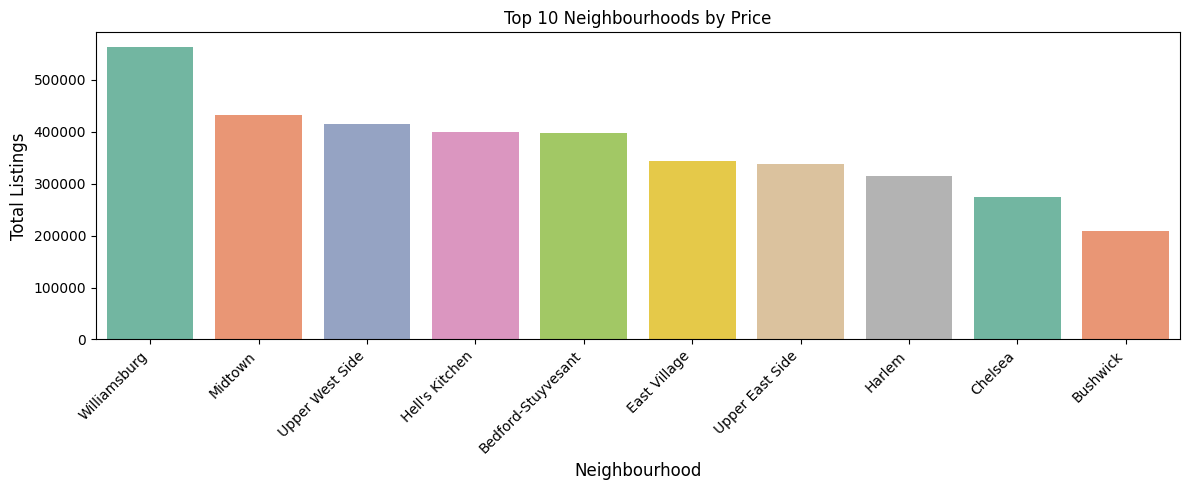

In [96]:
#Top 10 neighbourhood based on price
areas = []
area_listing = []
area_group = df.groupby('neighbourhood')
for area, data in area_group:
  areas.append(area)
  area_listing.append(data['price'].sum())

neighbourhood_df = pd.DataFrame({
    'Neighbourhood': areas,
    'Total Listings': area_listing
})

neighbourhood_df = neighbourhood_df.sort_values(by='Total Listings', ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,5))
sns.barplot(data=neighbourhood_df.head(10), x='Neighbourhood', y='Total Listings',palette='Set2')
plt.title('Top 10 Neighbourhoods by Price', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Listings', fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **bar plot** to show the top 10 neighborhoods by **total listings** because it clearly compares categorical data. This format effectively highlights which neighborhoods have the most listings, providing quick insights into market trends and investment opportunities.

##### 2. What is/are the insight(s) found from the chart?

The bar plot displays the top 10 neighborhoods based on the **total price** of listings, revealing significant revenue potential, particularly in areas like **Williamsburg and Midtown**. Higher-priced listings indicate these neighborhoods' desirability among guests, while areas with substantial total prices present attractive investment opportunities for hosts looking to expand or enter the market. Overall, this visualization offers valuable insights into neighborhood pricing dynamics, aiding in strategic decision-making.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can positively impact business by helping hosts optimize pricing and tailor offerings based on high-demand neighborhoods, boosting occupancy and revenue. However, insights indicating high competition with low prices may signal market saturation, leading to reduced profit margins. Additionally, areas with low demand could deter new hosts or expansion efforts, highlighting risks in certain markets.

#### Chart - 6

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

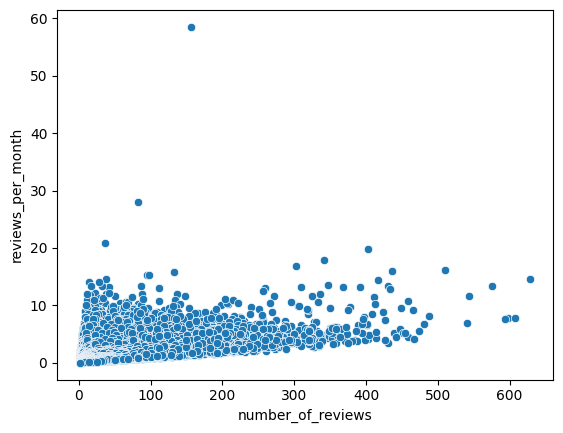

In [97]:
#No_of_reviews vs Reviews per month
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', data=df)

##### 1. Why did you pick the specific chart?

The scatter plot between number of reviews and reviews per month helps identify patterns between the total number of reviews and the average reviews a listing receives per month.

##### 2. What is/are the insight(s) found from the chart?

Listings with higher reviews per month suggest consistent guest interest, even if their total number of reviews is relatively low. Conversely, listings with a high total number of reviews but low reviews per month may indicate declining interest over time. This helps hosts assess both the ongoing popularity and engagement trends of their listings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights from this chart can positively impact business by helping hosts identify listings with sustained guest interest, indicated by high reviews per month, allowing them to prioritize and optimize these listings for better returns. Listings with declining reviews per month but high total reviews may signal waning popularity, prompting hosts to refresh their offerings or improve marketing efforts to maintain relevance.

However, insights indicating declining guest interest over time could lead to negative growth if not addressed. Hosts may face challenges maintaining profitability if listings lose appeal, highlighting the importance of adapting to guest preferences.

#### Chart - 7

<ipython-input-98-5df05ee00041>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='minimum_nights', data=df, palette="Set2", ci=None)
<ipython-input-98-5df05ee00041>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='minimum_nights', data=df, palette="Set2", ci=None)


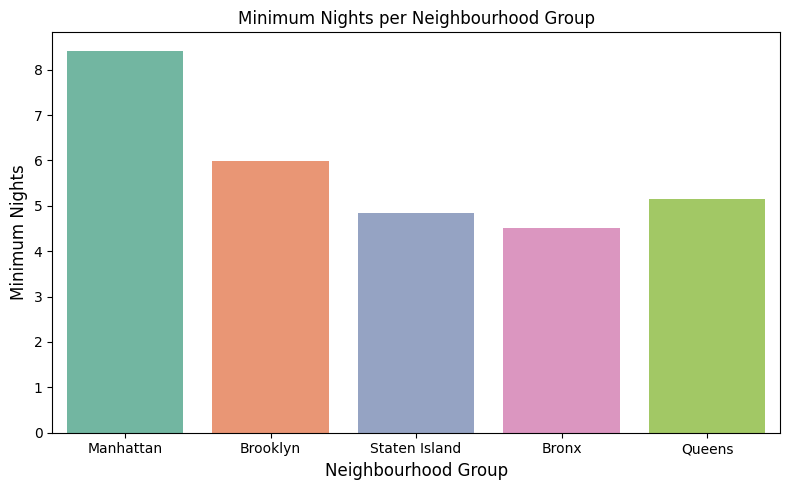

In [98]:
#Neighbourhood groups vs minimum night
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='minimum_nights', data=df, palette="Set2", ci=None)
plt.title('Minimum Nights per Neighbourhood Group', fontsize=12)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Minimum Nights', fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot for visualizing minimum nights per neighborhood group because it clearly compares the average minimum stay requirements across different groups. This chart makes it easy to identify variations in minimum night policies, allowing for straightforward comparison between neighborhoods, which is useful for understanding hosting regulations and guest expectations.

##### 2. What is/are the insight(s) found from the chart?


The bar plot shows that neighborhoods like **Manhatten and Brooklyn** have significantly higher minimum night requirements, indicating they may target longer-term stays. In contrast, neighborhoods such as **Bronx** have lower minimum night requirements, making them more attractive for short-term guests. This variation affects the type of guests each neighborhood attracts and can influence booking frequency and occupancy rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart can positively impact business by helping hosts adjust their offerings based on neighborhood-specific minimum night requirements. Areas with shorter stays may attract more short-term guests, increasing occupancy rates, while longer minimum stays can provide stability with fewer bookings. However, strict minimum night policies may limit flexibility, potentially leading to negative growth if demand for longer stays is low. Balancing stay requirements with guest preferences is crucial to mitigate these risks.

#### Chart - 8

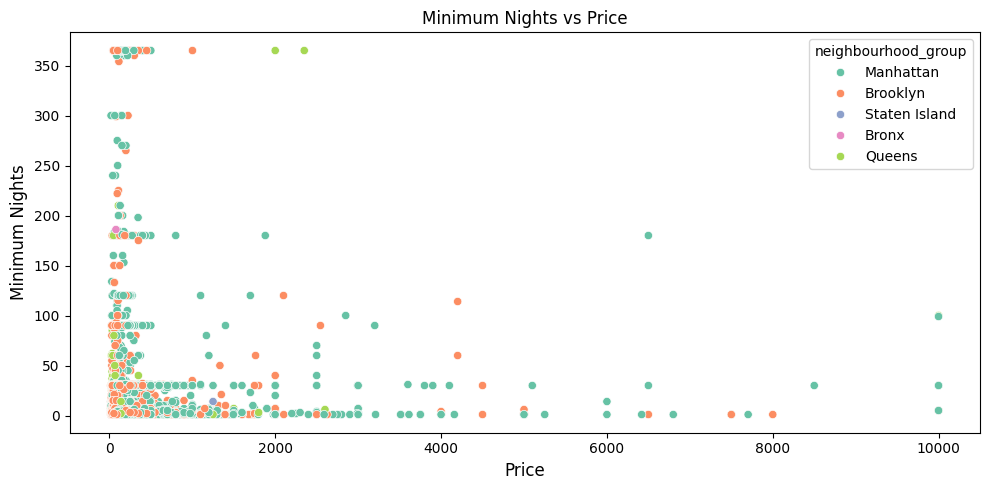

In [99]:
#minimum night vs price
plt.figure(figsize=(10,5))
sns.scatterplot(y='minimum_nights', x='price', data=df, hue='neighbourhood_group', palette="Set2")
plt.title('Minimum Nights vs Price', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Minimum Nights', fontsize=12)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a **scatter plot** to illustrate the relationship between **minimum nights** and **price** because it clearly shows how these two variables interact. Using different colors for each **neighbourhood group** allows for easy comparisons, highlighting trends and correlations that can inform hosts' pricing strategies and market understanding.

##### 2. What is/are the insight(s) found from the chart?

The above scatter plot shows that majority of the customers tend to prefer accommodations with budget-friendly prices and minimal mandatory stay requirements. Also, Manhattan offers the widest range of options, featuring both diverse price points and varying minimum stay policies followed by Brooklyn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can significantly impact business positively by enhancing pricing strategies, guiding targeted marketing efforts, and improving guest experiences. Hosts can attract more guests by offering budget-friendly options with minimal mandatory stays, especially in popular areas like Manhattan. However, high minimum stay requirements may deter potential guests, particularly budget travelers, leading to lower occupancy rates and reduced revenue. Additionally, an oversaturation of high-priced listings in competitive neighborhoods can drive prices down, negatively affecting profitability. Therefore, while the insights can foster growth, certain practices must be managed carefully to avoid adverse effects.

#### Chart - 9

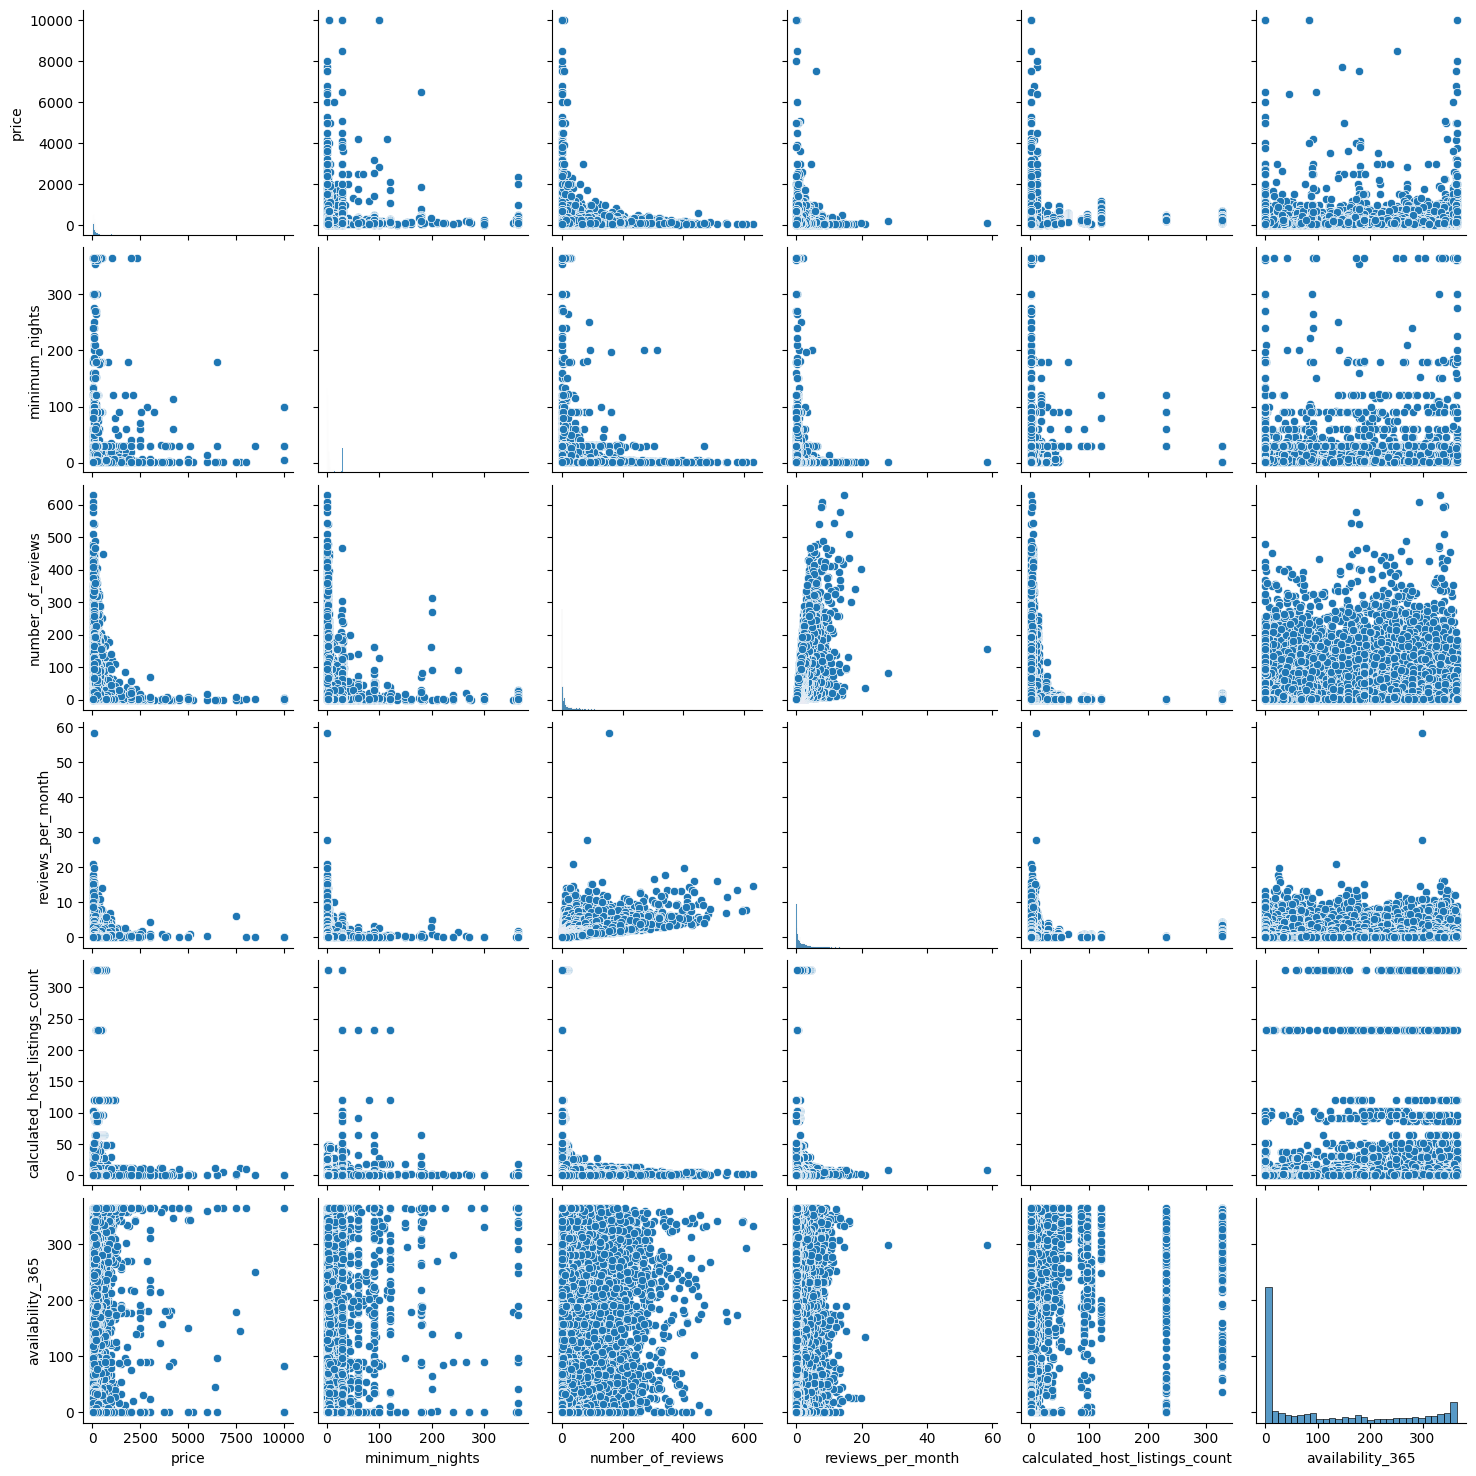

In [100]:
#Pairplot
pair_df = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
sns.pairplot(pair_df)

##### 1. Why did you pick the specific chart?

I selected a pair plot to visualize relationships between key variables in the Airbnb dataset, including price, minimum nights, and reviews. This chart helps identify patterns, correlations, and outliers, offering a comprehensive overview of how these factors interact and influence one another.

##### 2. What is/are the insight(s) found from the chart?

The pair plot reveals that lower-priced Airbnb listings tend to receive more reviews, suggesting that budget-friendly properties are more frequently booked and reviewed. Additionally, listings with lower minimum night requirements generally have higher prices,  indicating that more flexible booking options might cater to premium customers. Overall, these insights highlight the interrelationships among key factors in the Airbnb market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the Airbnb dataset can positively impact business by optimizing pricing and booking policies. Lower-priced listings attract more reviews, boosting occupancy, while flexible booking options with higher prices can attract premium customers. However, shorter stays may increase operational costs, and setting prices too low for reviews could hurt long-term profitability. A balanced approach is key to sustaining growth.

#### Chart - 10

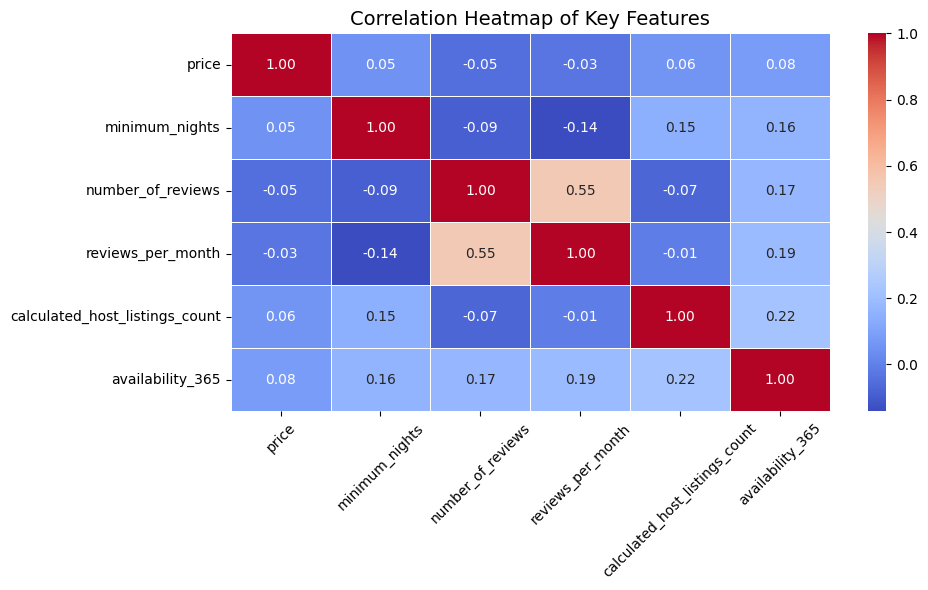

In [101]:
# Calculating the correlation matrix for the numeric columns
corr_df = df[['price', 'minimum_nights', 'number_of_reviews',
              'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# Visualizing correlation using seaborn heatmap with enhanced aesthetics
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Key Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a heatmap to clearly visualize the strength and direction of correlations between key features. It helps quickly identify strong relationships, making it easier to select important variables for further analysis.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals a weak negative correlation of -0.05 between price and the number of reviews, indicating price has little impact on reviews. The correlation between price and minimum nights is negligible at 0.05. Availability shows a positive correlation of 0.17 with reviews, suggesting year-round listings attract more bookings. Additionally, there is a positive correlation of 0.22 between listings and availability, indicating that properties with more listings tend to have higher availability. Most notably, reviews per month strongly correlate at 0.55 with total reviews, suggesting actively booked listings receive consistent feedback. These insights highlight the complex relationships among key variables in the Airbnb market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can create a positive business impact by helping hosts optimize pricing and availability strategies. Understanding that year-round availability correlates with more reviews can encourage hosts to maintain flexible booking options, boosting occupancy. However, the weak correlation between price and reviews suggests that setting prices too high may not attract more bookings, potentially leading to negative growth. Additionally, if hosts focus solely on attracting reviews without considering profitability, they risk lowering prices unsustainably, harming long-term revenue. Balancing pricing and availability is essential for sustained growth.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve business objectives effectively, I suggest the following strategies based on the insights gathered:

1. **Market Segmentation Strategy**: Target specific market segments by tailoring listings to meet the needs of diverse travelers. Focus on budget-friendly offerings in neighborhoods like the Bronx while also enhancing premium listings in higher-priced areas like Manhattan.

2. **Expand Room Type Offerings**: Increase the availability of entire home listings, as they command higher prices. However, maintain a variety of room types (private and shared rooms) to cater to different guest preferences and attract a wider audience.

3. **Dynamic Pricing Adjustments**: Implement flexible pricing strategies in neighborhoods with lower availability, such as Brooklyn, to capitalize on high demand. In contrast, consider price reductions and improved quality for listings in areas with high availability, like Staten Island, to attract more bookings.

4. **Enhance Guest Engagement**: Focus on improving guest experience and quality to boost the number of reviews per month. Regularly refresh listings showing declining review trends to maintain guest interest and relevance in the market.

5. **Flexible Booking Policies**: Strike a balance between minimum night requirements and guest preferences. Allow for shorter stays in popular areas to increase occupancy rates while also catering to longer stays where appropriate for stability.

6. **Monitor Market Trends**: Stay adaptable and vigilant regarding changes in market dynamics. Avoid over-reliance on popular strategies, and be willing to explore niche segments to mitigate the risk of market saturation.

7. **Leverage Data for Decision-Making**: Use insights from data analysis to inform pricing strategies and marketing efforts. Data-driven decisions can align offerings with guest preferences, ultimately leading to higher occupancy rates and revenue growth.

By implementing these strategies, the client can enhance competitiveness, optimize pricing, and improve overall guest satisfaction, leading to sustainable business growth in the Airbnb market.

# **Conclusion**

This project has provided valuable insights into the Airbnb market by analyzing various factors such as pricing, room types, neighborhood dynamics, and guest engagement. Through data-driven analysis, we identified key trends, including the significance of market segmentation, the importance of diverse room offerings, and the need for flexible pricing strategies. By understanding the relationship between minimum night requirements and guest preferences, hosts can optimize their listings to enhance occupancy rates. The findings emphasize the importance of continuous monitoring of market trends and adapting strategies accordingly. Overall, leveraging these insights can drive informed decision-making, ultimately leading to sustainable growth and increased profitability in the competitive Airbnb landscape.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***